## ECON 323 Final Project

#### ***NBA Games and LA Car Accidents: Do Sporting Events Lead to More Car Accidents?***

### Introduction 
Alcohol consumption is undoubtedly a staple part of the experience for many sports lovers; fans taking a sip of beer while cheering for their favorite team live at a stadium; game gatherings with friends, food, and a lot of booze; or oven watching live sports at a bar. There is no doubt that alcohol and sport are indelibly intertwined. Erickson et al. (2011) examined the blood alcohol content levels of adult attendees following 13 major league baseball games and three national league football games. Out of all attendees examined, 41% tested positive for alcohol and those who reported tailgating prior to the game were more likely to have higher blood alcohol content levels than the legal limit. Similarly, Wolfe et al. (1998) tested the blood alcohol levels of male spectators at six major league baseball games and found that more than half of the 20- to 35-year-old participants tested positive for alcohol and 10.8% of the age group, had higher blood alcohol levels than the legal limit. Not surprisingly, such a high rate of alcohol consumption results in an increase in vehicle fatalities. Redelmeier and Stewart (2003) studied the vehicle accident statistics on 27 consecutive Super Bowls and observed a 41% relative increase in car crashes in 4 hours following the Super Bowl game. [Delphi Health Group](https://delphihealthgroup.com/exploring-alcohol-consumption-across-nba-fan-bases/#:~:text=Fans%20Filling%20Cups,half%20of%20a%20drink%20afterward.) collected survey responses from 1,258 NBA fans from Amazon’s Mechanical Turk and found that almost 20% them admitted to driving drunk after attending an NBA game.

To explore the correlation between sporting events and car accidents, this project examines whether there are more car accidents in Los Angeles on the days that LA basketball teams, i.e. The LA Lakers and the LA Clippers, play. The reasons I chose to study LA and LA's basketball teams are two-fold. First, driving is LA's dominant mode of transportation. Second, basketball is arguably LA's most popular sport; the city is known for its rich basketball history with the Lakers’ 11 NBA Championship titles and UCLA’s 11 NCAA basketball titles. In addition, LA is the only city with more than one NBA teams. Given how many people drive and how popular basketball is in LA, I expect there to be an increase in car accidents on the days either of the 2 LA teams plays. To answer the question, I measure the effects of the Clippers'/the Lakers' game on the daily number of car accidents in LA through January 2010 to June 2019 through the method of OLS regression. My findings indicate that a Lakers/Clippers game leads to an approximately 40% increase in car accidents in LA. In the extension, I show that the increase in car accidents is mainly borne by male victims and that magnitude of the effect doesn't seem to vary for stronger for areas that are closer to the stadium.   

### Data & Visualizations
The car accident dataset used in this analysis comes from Los Angeles Police Department (LAPD)'s records of every car accident in LA from 2009 to present. It contains detailed information including date, time, area name of where the crash happened, and victim's information of each car crash. The dataset is available [here](https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w). The NBA game data used in this project includes information on all NBA games since the 2004 season with the date, teams and game outcomes. The dataset was created using NBA stats from [the Official NBA website](https://www.nba.com/stats). The dataset is available on [Kaggle](https://www.kaggle.com/datasets/nathanlauga/nba-games). I have chosen to exclude data after July 2019 as the 2019-2020 and 2020-2021 NBA seasons were heavily disrupted by Covid 19. I restrict my focus to the crashes that happen before 8 am and after 12 pm because all NBA games are played in the evening and finish at night so any crash that happens between 8 am and 12 pm are unlikely to be related to NBA games. In addition, for any crash that happens before 8 am, if there was a Lakers game or a Clippers game the day before, then the crash is assumed to be associated with the day before and gets added to the number of crashes of the day before instead. This is to capture any spillover effects to NBA games on the next day. Another factor that is known to have large influence on car accidents is weather. According to [US department of Transportation](https://ops.fhwa.dot.gov/weather/q1_roadimpact.htm#:~:text=On%20average%2C%20there%20are%20over,1%2C235%2C000%20%2D%20are%20weather%2Drelated.), over 20% of vehicle crashes in each year are weather-related and the most common weather that contribute to these car crashes is rainfall. In order to separate the effects of weather from our analysis, I also obtained LA climate data including average temperature, precipitation, and average wind speed from [NASA Earth Science's website](https://power.larc.nasa.gov/#resources).

After cleaning and merging the 3 datasets together, my final dataset contains information on 439198 car crashes from January 1st, 2010 to June 30th, 2019. To examine whether NBA games lead to an increase in car accidents, I aggregate the data by summing up the number of car crashes on each date and area. The final dataset consists of 72085  date-area observations. The description of the final dataset and the first 5 observations of the final dataset are shown below.

In [18]:
%run data_cleaning.ipynb
%matplotlib inline
crashes_by_area.info()
crashes_by_area.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72085 entries, 0 to 72084
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_associated   72085 non-null  datetime64[ns]
 1   area_name         72085 non-null  category      
 2   num_crashes       72085 non-null  int64         
 3   is_la_game_day    72085 non-null  int64         
 4   HOME_NICKNAME     29253 non-null  object        
 5   VISITOR_NICKNAME  29253 non-null  object        
 6   HOME_TEAM_WINS    29253 non-null  category      
 7   day_of_week       72085 non-null  category      
 8   month             72085 non-null  category      
 9   year              72085 non-null  category      
 10  day               72085 non-null  category      
 11  is_holiday        72085 non-null  category      
 12  avg_temp          72085 non-null  float64       
 13  prep              72085 non-null  float64       
 14  wind_speed        7208

,date_associated,area_name,num_crashes,is_la_game_day,HOME_NICKNAME,VISITOR_NICKNAME,HOME_TEAM_WINS,day_of_week,month,year,day,is_holiday,avg_temp,prep,wind_speed,is_home_game_day
0,2009-12-31,77th Street,7,1,Clippers,76ers,1.0,3,12,2009,31,0,10.4,0.0,3.95,1
1,2009-12-31,Devonshire,1,1,Clippers,76ers,1.0,3,12,2009,31,0,10.4,0.0,3.95,1
2,2009-12-31,Foothill,1,1,Clippers,76ers,1.0,3,12,2009,31,0,10.4,0.0,3.95,1
3,2009-12-31,Harbor,2,1,Clippers,76ers,1.0,3,12,2009,31,0,10.4,0.0,3.95,1
4,2009-12-31,Hollenbeck,4,1,Clippers,76ers,1.0,3,12,2009,31,0,10.4,0.0,3.95,1


##### Let's look at some visualizations to understand the data better.

<AxesSubplot:xlabel='month'>

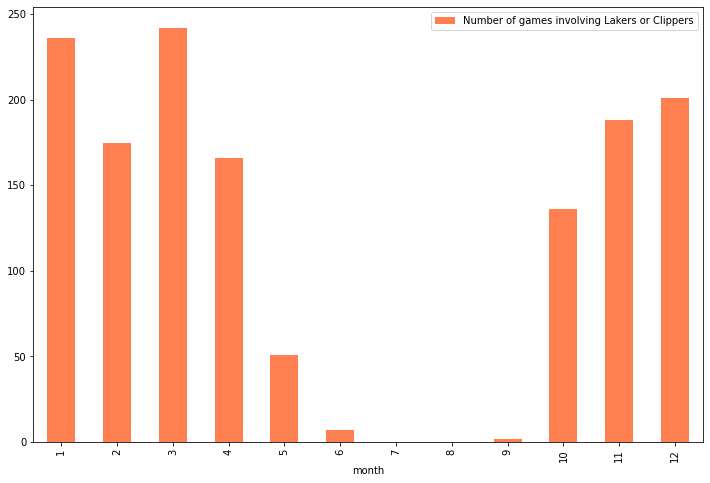

In [19]:
temp = crashes_by_area.groupby("date_associated").agg({"is_la_game_day": lambda x: 1 if (sum(x) >= 1) else 0, "num_crashes":"sum", "year": "first", "month":"first","day_of_week":"first","avg_temp":"first","prep":"first", "wind_speed":"first", })
temp = temp.rename(columns = {"is_la_game_day": "Number of games involving Lakers or Clippers"})
temp.groupby("month").agg({"Number of games involving Lakers or Clippers": "sum"}).plot.bar(figsize=(12, 8), color="coral")

As we can see from the bar chart above, NBA regular season usually starts in October and ends in early April, followed by NBA playoffs which always starts in late April and ends around mid June.

Next, let's look at how LA's road accident trend has changed over 2008 - 2019. I will also plot the average monthly precipitation to see how car accidents relate to weather.

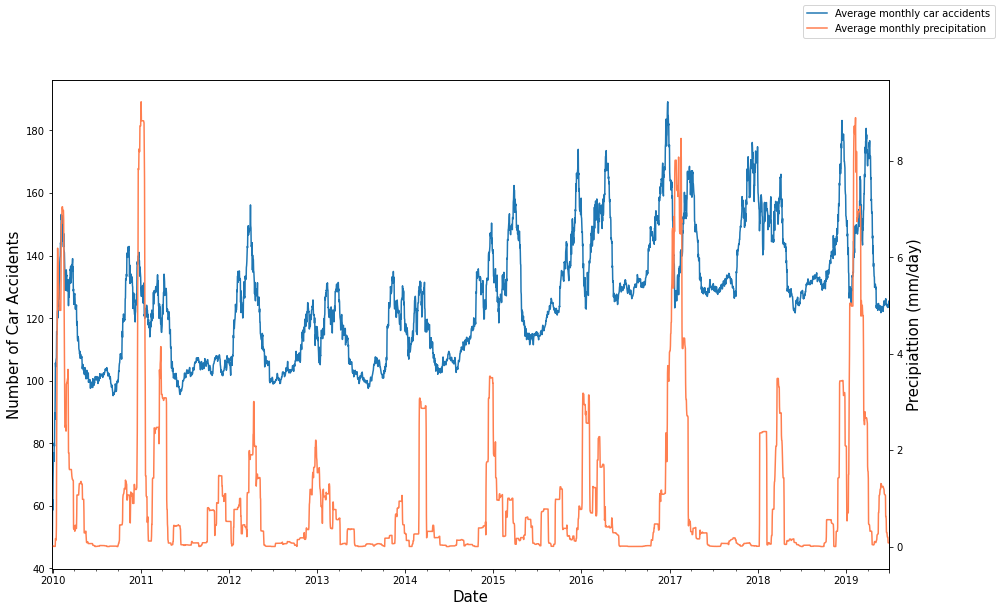

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))
temp.rolling("30d").mean()["num_crashes"].plot(ax=ax)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Number of Car Accidents", fontsize=15)
ax2 = ax.twinx()
temp.rolling("30d").mean()['prep'].plot(ax=ax2, color="coral")
ax2.set_ylabel("Precipiattion (mm/day)", fontsize=15)
fig.legend(["Average monthly car accidents","Average monthly precipitation"])

From the plot above, we can see that the number of car accidents increased gradually from 2010 to 2019 despite heavy fluctuations throughout the year. Additionally, car accidents seem to increase with precipitation. A spike in car accidents is usually accompanied by a spike in precipitation, agreeing with the US department of Transportation's stats. 

Perhaps people go out more in the summer and that could potentially result in higher road accident rates during summer months. To see how car accident rates vary across months, let's look at the average car accidents of each month to observe the trend within a year.

Text(0, 0.5, 'Average Car Accidents')

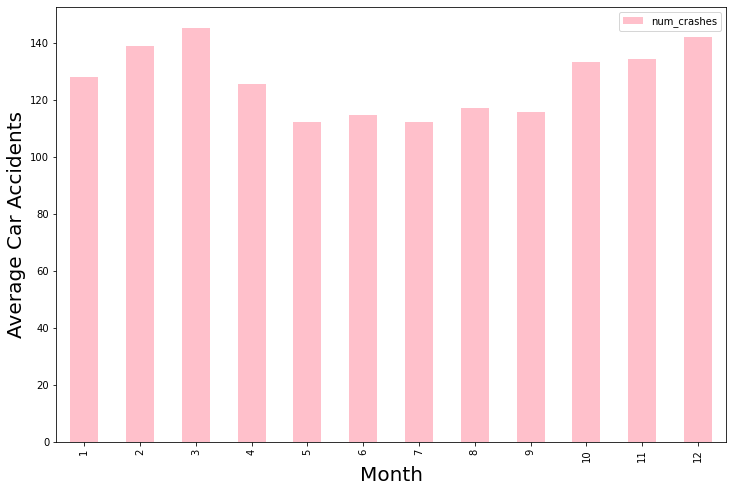

In [21]:
fig = temp.reset_index().groupby("month").agg({"num_crashes": "mean"}).plot.bar(figsize=(12, 8), color="pink")
fig.set_xlabel("Month", fontsize=20)
fig.set_ylabel("Average Car Accidents", fontsize=20)

As we can see, car accidents tend to be higher at the beginning of the year from January to April and at the end of the year from October to December but remains relatively stable during between May and September. 

Next, let's see whether car accident rates vary over the weekend/weekday

Text(0, 0.5, 'Average Car Accidents')

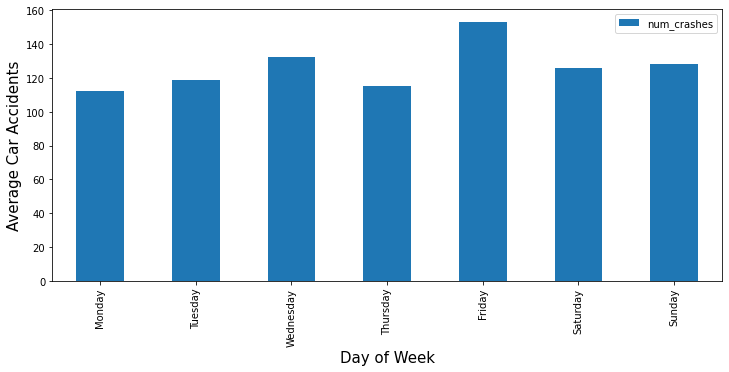

In [22]:
temp.day_of_week = temp.day_of_week.replace({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})
crashes_by_area.day_of_week = crashes_by_area.day_of_week.replace({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})
fig = temp.reset_index().groupby("day_of_week").agg({"num_crashes": "mean"}).plot.bar(figsize=(12, 5))
fig.set_xlabel("Day of Week", fontsize=15)
fig.set_ylabel("Average Car Accidents", fontsize=15)

On average, car accidents are higher on Wednesday and Friday. But other than those 2 days, car accident rates don't seem to vary much over the week. In order to separate the 

Now, let's see whether the number of car accidents was higher on the days the Lakers or the Clippers played.

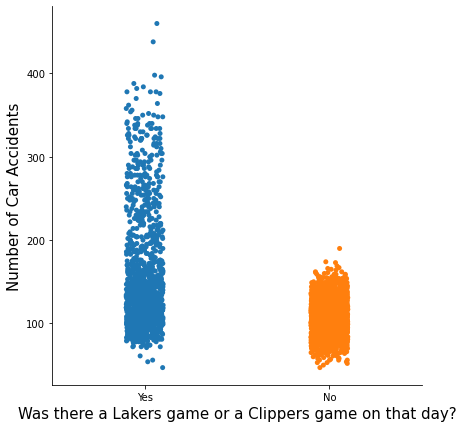

In [23]:
import seaborn as sns

temp2 = crashes_by_area.groupby("date_associated").agg({"is_la_game_day": "first", "num_crashes":"sum", "year": "first", "month":"first"})
temp2.is_la_game_day = temp2.is_la_game_day.replace({0: "No", 1: "Yes"})
fig = sns.catplot(data=temp2, x="is_la_game_day", y="num_crashes", height=6)
fig.set_xlabels("Was there a Lakers game or a Clippers game on that day?", fontsize=15)
fig.set_ylabels("Number of Car Accidents", fontsize=15)

As the plot suggests, the number of car accidents were a lot higher on the days either of the two teams played. However, because most NBA games are played in the months where there are more car accidents (October - April), it is possible that the difference that we saw in the plot above it driven entirely by the month effects and has nothing to do with the NBA game itself.

Lastly, based on Redelmeier and Stewart's findings, it is possible that the increase in car accidents from NBA games is mainly caused by people who go to the game at the stadium. To see whether this is true, let's restrict our focus to only the days where there is a Lakers or Clippers game and create a box plot to compare the number of car crashes on days where the Lakers or the Clippers is the home team and days where they are the visitor team. If our hypothesis is correct, then the box plots should indicate that there are more car accidents in LA on the days where there is a home game.

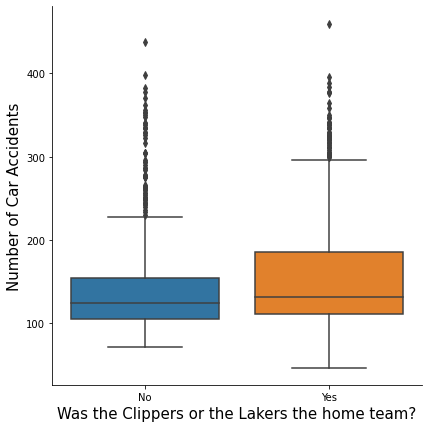

In [24]:
# create box plots 
temp3 = crashes_by_area[crashes_by_area['is_la_game_day'] == 1]
temp3 = temp3.groupby("date_associated").agg({"is_la_game_day": "first", "num_crashes":"sum", "is_home_game_day": "first"})
temp3.is_home_game_day = temp3.is_home_game_day.replace({0: "No", 1: "Yes"})
fig = sns.catplot(data=temp3, x="is_home_game_day", y="num_crashes", height=6, kind="box")
fig.set_xlabels("Was the Clippers or the Lakers the home team?", fontsize=15)
fig.set_ylabels("Number of Car Accidents", fontsize=15)

Unfortunately, the box plots aren't very informative as the 2 box plots overlap and their median lines are inside the overlapping range which means we can't say for sure whether there's a statistically significant difference between the 2 groups. 

Since data visualizations weren't the most useful in identifying the causal effect of NBA games on car accidents, let us resort to some more effective tools for causal inference. 

### Empirical Methodology
To estimate the impact of NBA games on car accidents, I will run an ordinary least squares regression on the number of car accidents per day in each area. For the baseline analysis, the following regression specifications will be run.

1) $$ log(\text{NumCrashes}_{it}) = {\beta_0} + {\beta_1}\text{IsLAGameDay}_{t} + {\beta_2}\text{IsHomeGameDay}_{t} + {\beta_3}\text{IsHoliday}_{t} + \epsilon_{it} $$
2) $$ log(\text{NumCrashes}_{it}) = {\beta_0} + {\beta_1}\text{IsLAGameDay}_{t} + {\beta_2}\text{IsHomeGameDay}_{t} + {\beta_3}\text{IsHoliday}_{t} + {\beta_4}\text{AvgTemp}_{t} + {\beta_5}\text{Precipitation}_{t} + {\beta_6}\text{WindSpeed}_{t} + \text{Area}_i + \text{Year}_t + \text{Month}_t + \text{DayofWeek}_t+ \epsilon_{it} $$

The first model is a parsimonius model with only the independent variables of interest ($\text{IsLAGameDay}$ and $\text{IsHomeGameDay}$) and a dummy indicator of a holiday. The second model is the complete model with all controls. The subscripts $i$ and $t$ denote area $i$ on date $t$ respectively. Dependent variable is log of number of car accidents on date $t$ in area $i$. $\text{IsLAGameDay}$ is a binary variable indicating whether there is a Lakers game or a Clippers game on date $t$. $\text{IsHoliday}$ is a binary indicator of whether date $t$ is a US federal holiday. $\text{IsHomeGameDay}$ is a binary indicator of whether the Clippers of the Lakers has a home game on date $t$. $\text{AvgTemp}$ denotes average daily temperature. $\text{Precipitation}$ is average daily precipitation. $\text{WindSpeed}$ is average daily wind speed. $\text{Area}$ represents area fixed effects. $\text{Year}$ represents year fixed effects. $\text{Month}$ is the month fixed effects. $\text{DayofWeek}$ is the day-of-the-week fixed effects. $\epsilon_{it}$ represents the error term. The $\beta$s are the estimated parameters with $\beta_1$ being the estimated impact of NBA games on car accidents. All estimators are computed using heteroskedasticity-robust standard errors.

### Regression Analysis

All regressions in this study are run using the statsmodel package.

In [25]:
! pip install stargazer

In [26]:
import statsmodels.formula.api as smf
import math
from stargazer.stargazer import Stargazer

# Convert is_la_game_day to categorical variables
crashes_by_area['is_la_game_day'] = pd.Categorical(crashes_by_area.is_la_game_day)

# Ceate log of num_crashes
crashes_by_area['ln_num_crashes'] = crashes_by_area['num_crashes'].map(lambda x: math.log(x))

In [27]:
model0 = smf.ols(formula='ln_num_crashes ~ is_la_game_day + is_home_game_day + is_holiday',
                 data=crashes_by_area).fit(cov_type='HC3')
model1 = smf.ols(formula='ln_num_crashes ~ is_la_game_day + is_home_game_day + is_holiday + avg_temp + prep + wind_speed + area_name + year + month + day_of_week',
                 data=crashes_by_area).fit(cov_type='HC3')

stargazer = Stargazer([model0, model1])
stargazer.custom_columns(['Parsimonious model', 'Model with full controls'], [1, 1])
stargazer.title("Baseline Results")
stargazer.covariate_order(['is_la_game_day[T.1]', 'is_home_game_day[T.1]'])
stargazer.rename_covariates({'is_la_game_day[T.1]': 'IsLAGameDay = True', 'is_home_game_day[T.1]': 'IsHomeGameDay = True'})
stargazer.add_line('Holiday control', ['Yes','Yes'])
stargazer.add_line('Weather controls',  ['No','Yes'])
stargazer.add_line('Area fixed effects',  ['No','Yes'])
stargazer.add_line('Time fixed effects',  ['No','Yes'])
stargazer.show_confidence_intervals(True)
stargazer.show_degrees_of_freedom(False)
stargazer

#### Results
The regression results above confirm that there is a statistically significant association between NBA games and car accidents in LA, even for non-home games. Comparing the goodness-of-fit of the parsimonius model and the model with complete set of controls, we can see that the adjusted $R^2$ of the complete model is almost 4 times larger than the parsimonius model, suggesting that the complete model does a much better job of fitting the data. The coefficient of $\text{IsLAGameDay}$ in the second column suggests that on the days the Lakers or the Clippers has a game, the number of car accidents in LA will increase by approximately 33.4%. Additionally, based on the coefficient of $\text{IsHomeGameDay}$, when on the days where there is a home game, there will also be an additional 7.2% increase in the number of car accidents, making the total increase in road accidents become 40.6%. This result agrees with the effects documented by studies and illustrates that a Lakers/Clippers game results in a substantial increase in car accidents in LA.

### Extension 1

Perhaps, the effect of NBA games on car accidents is different for men and women. This seems plausible since most people who watch sports are men and men are more prone to get into car accidents than women, so we would expect to see a stronger effect for men than for women. To test this assumption, I will separate regressions for crashes with female victims and male victims. But before doing any in-depth analysis, let's create a visualization to compare the car accident rates between men and women.  

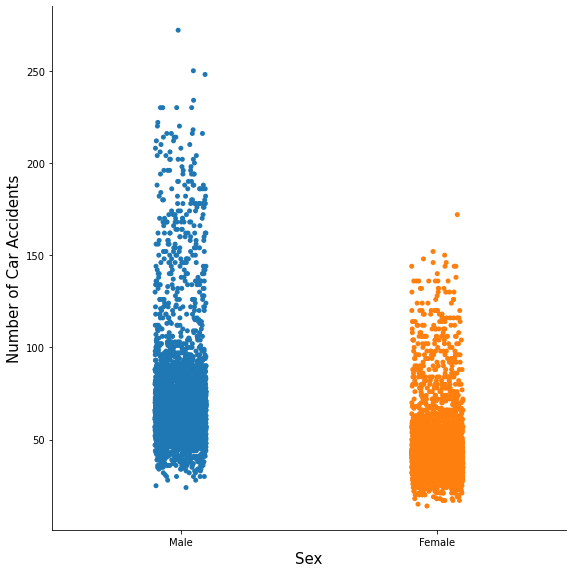

In [28]:
crashes_by_area_male['is_la_game_day'] = pd.Categorical(crashes_by_area_male.is_la_game_day)
crashes_by_area_male['ln_num_crashes'] = crashes_by_area_male['num_crashes'].map(lambda x: math.log(x))

crashes_by_area_female['is_la_game_day'] = pd.Categorical(crashes_by_area_female.is_la_game_day)
crashes_by_area_female['ln_num_crashes'] = crashes_by_area_female['num_crashes'].map(lambda x: math.log(x))

temp_male = crashes_by_area_male.groupby("date_associated").agg({"is_la_game_day": "first", "is_home_game_day": "first", "num_crashes":"sum", "year": "first", "month":"first"})
temp_female = crashes_by_area_female.groupby("date_associated").agg({"is_la_game_day": "first", "is_home_game_day": "first", "num_crashes":"sum", "year": "first", "month":"first"})

temp_male = temp_male[["num_crashes", "is_la_game_day", "is_home_game_day"]]
temp_male["sex"] = "Male"
temp_female = temp_female[["num_crashes", "is_la_game_day", "is_home_game_day"]]
temp_female["sex"] = "Female"

temp = pd.concat([temp_male, temp_female])

# Creat a strip plot
fig = sns.catplot(data=temp, x="sex", y="num_crashes", height=8)
fig.set_xlabels("Sex", fontsize=15)
fig.set_ylabels("Number of Car Accidents", fontsize=15)

Not surprisingly, the number of car accidents with male victims is higher than the number of car accidents with female victims, but this doesn't tell us whether the effect of NBA games is stronger for men or not. Let's create a plot separately for men and women.

[Text(0.5, 0, 'Did the Clippers or the Lakers play on that day?'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Female')]

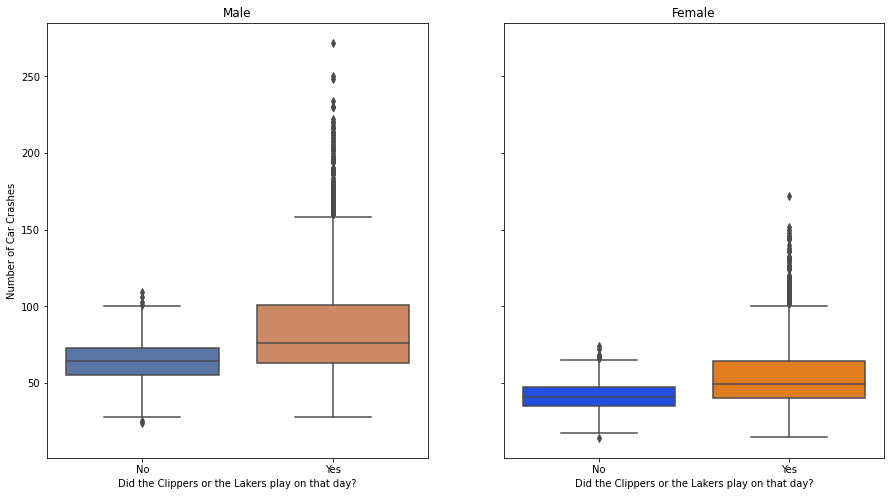

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15,8), sharey=True)
temp_male.is_la_game_day = temp_male.is_la_game_day.replace({0: "No", 1: "Yes"})
temp_female.is_la_game_day = temp_female.is_la_game_day.replace({0: "No", 1: "Yes"})
fig1 = sns.boxplot(ax = axes[0], data=temp_male.reset_index(), x="is_la_game_day", y="num_crashes", palette="deep")
fig1.set(xlabel="Did the Clippers or the Lakers play on that day?", ylabel="Number of Car Crashes", title='Male')
fig2 = sns.boxplot(ax = axes[1], data=temp_female.reset_index(), x="is_la_game_day", y="num_crashes", palette="bright")
fig2.set(xlabel="Did the Clippers or the Lakers play on that day?", ylabel=None, title='Female')

By looking at these box plots, we know that there are car accidents involving both men and women on the days the Clippers or the Lakers has a game. Although the difference between the interquartile ranges of the left box and the right box in the men's plot is slightly greater than difference in the women's plot, we still can't tell whether the effect is stronger as we hypothesized or not. Since the visualization is not precise, so let's run some regressions. 

In [30]:
############################### regression for crashes with male victims #####################################
model2 = smf.ols(formula='ln_num_crashes ~ is_la_game_day + is_home_game_day + is_holiday + avg_temp + prep + wind_speed + area_name + year + month + day_of_week',
                 data=crashes_by_area_male).fit(cov_type='HC3')

stargazer = Stargazer([model2])
stargazer.title("Crashes with male victims")
stargazer.covariate_order(['is_la_game_day[T.1]', 'is_home_game_day[T.1]'])
stargazer.rename_covariates({'is_la_game_day[T.1]': 'IsLAGameDay = True', 'is_home_game_day[T.1]': 'IsHomeGameDay = True'})
stargazer.show_confidence_intervals(True)
stargazer.show_degrees_of_freedom(False)
stargazer

In [31]:
############################### regression for crashes with female victims #################################
model3 = smf.ols(formula='ln_num_crashes ~ is_la_game_day + is_home_game_day + is_holiday + avg_temp + prep + wind_speed + area_name + year + month + day_of_week',
                 data=crashes_by_area_female).fit(cov_type='HC3')
stargazer = Stargazer([model3])
stargazer.title("Crashes with female victims")
stargazer.covariate_order(['is_la_game_day[T.1]', 'is_home_game_day[T.1]'])
stargazer.rename_covariates({'is_la_game_day[T.1]': 'IsLAGameDay = True', 'is_home_game_day[T.1]': 'IsHomeGameDay = True'})
stargazer.show_confidence_intervals(True)
stargazer.show_degrees_of_freedom(False)
stargazer

#### Results

The results above support our hypothesis; when there is the Lakers or the Clippers has a home game, there will be a 37.1% increase in car crashes involving men and a 29.3% increase in car accidents involving women. Again, this result is not surprising since most people who go watch the NBA games are probably men.

### Extension 2

Because the increase in car accidents is greater for home games, most of those car accidents are likely to be caused by people who go watch the game at the stadium. If this was the case, then we should see a greater increase in car accidents in areas that are near the NBA stadium relative to areas that are further away from the stadium on the days there is a home game. To test this conjecture, let's first create a dummy variable to indicate whether an area is close to the Crypto Stadium which is where the Lakers and the Clippers play their home games. 

In [32]:
############################### create is_close_to_the_stadium variable #################################

crashes_by_area["is_close_to_the_stadium"] = np.where((crashes_by_area["area_name"] == "Central") |
                                                     (crashes_by_area["area_name"] == "Rampart"), 1, 0)
crashes_by_area['is_close_to_the_stadium'] = pd.Categorical(crashes_by_area.is_close_to_the_stadium)

As usual, it's always a good idea to create some visualization before we run any regression to give us a good idea of the relationship we are trying to estimate. Let's restrict our focus to only the days where there is a home game and create a strip plot to compare the number of car crashes in the areas that are close to the Stadium which and areas that are further out.

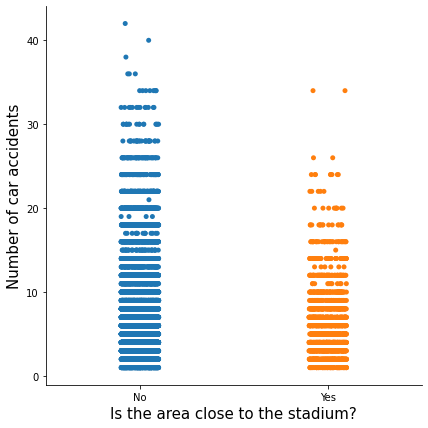

In [33]:
############################### create strip plot #################################
temp3 = crashes_by_area.copy()
temp3.is_close_to_the_stadium = temp3.is_close_to_the_stadium.replace({0: "No", 1: "Yes"})
temp3 = temp3[temp3["is_home_game_day"] == 1]
fig = sns.catplot(data=temp3, x="is_close_to_the_stadium", y="num_crashes", height=6, kind="strip")
fig.set_xlabels("Is the area close to the stadium?", fontsize=15)
fig.set_ylabels("Number of car accidents", fontsize=15)

Surprisingly, the plot shows that there are fewer cars accidents in the areas that are close to the Crypto Stadium than the areas that are further away from the stadium. However, it might be possible that the areas that are close to the stadium generally have significantly fewer car accidents than areas that are further away. If that was the case, then the strip plot above wouldn't be very informative.   Again, the most precise way of testing would be to run regression. To test the locality effect, I add an interaction term between $\text{IsHomeGameDay}$ and $\text{IsCloseToTheStadium}$ to my regression.

In [34]:
model4 = smf.ols(formula='ln_num_crashes ~ is_la_game_day + is_close_to_the_stadium*is_home_game_day + is_holiday + avg_temp + prep + wind_speed + area_name + year + day + month + day_of_week',
                 data=crashes_by_area).fit()

stargazer = Stargazer([model4])
stargazer.title("Regression to test the locality effect")
stargazer.covariate_order(['is_la_game_day[T.1]', 'is_home_game_day[T.1]', "is_close_to_the_stadium[T.1]", "is_close_to_the_stadium[T.1]:is_home_game_day[T.1]"])
stargazer.rename_covariates({'is_la_game_day[T.1]': 'IsLAGameDay = True', 'is_home_game_day[T.1]': 'IsHomeGameDay = True',  'is_close_to_the_stadium[T.1]': 'IsCloseToTheStadium = True', 'is_close_to_the_stadium[T.1]:is_home_game_day[T.1]': 'IsHomeGameDay = True & IsCloseToTheStadium = True'})
stargazer.show_confidence_intervals(True)
stargazer.show_degrees_of_freedom(False)
stargazer

#### Results

Base on the negative and statistically significant coefficient of $\text{IsCloseToTheStadium = True}$, our hypothesis that the areas near the stadium have fewer car accidents seems to be correct. However, since the coefficient of the interaction term is insignificant, there doesn't seem to be a locality effect on the car accidents in the areas near the stadium on a game day. 

### Conclusion
This project examines the relationship between sporting events and car accidents by focusing on Los Angeles' 2 NBA basketball teams, the Lakers and the Clippers. Using vehicle collision data from Los Angeles Police Department, this paper finds that there is an increase of about 40% in the number of car accident in LA on the days there is a home game. In addition, I also show that the increase in car accidents on a game day is mainly borne by men. Lastly, I show that magnitude of the effect doesn't seem to vary for stronger for areas that are closer to the stadium.  

It is also important to acknowledge the limitations of this project. First, I included all car crashes in my analysis but it would be useful for further studies to categorize car accidents base on the causes. Since many sports fans like to drink alcohol while watching sports, it may be the case that sporting games only lead to an increase in car accidents that are caused by drunk driving. Further studies should identify the effect of sports events on drunk driving. Second, the cutoff at 8 am and 12 pm that I chose is simply one possibility. I would perform the same analysis for different cutoffs and find the average effects. Finally, although I have added a variety of controls to my regression, there might other unobserved factors that can influence car accidents. Further studies should come up with a more complete set of controls variable to mitigate omitted variable bias which occurs when the results account for unexpected correlation between explanatory variables and the regression error term.  
